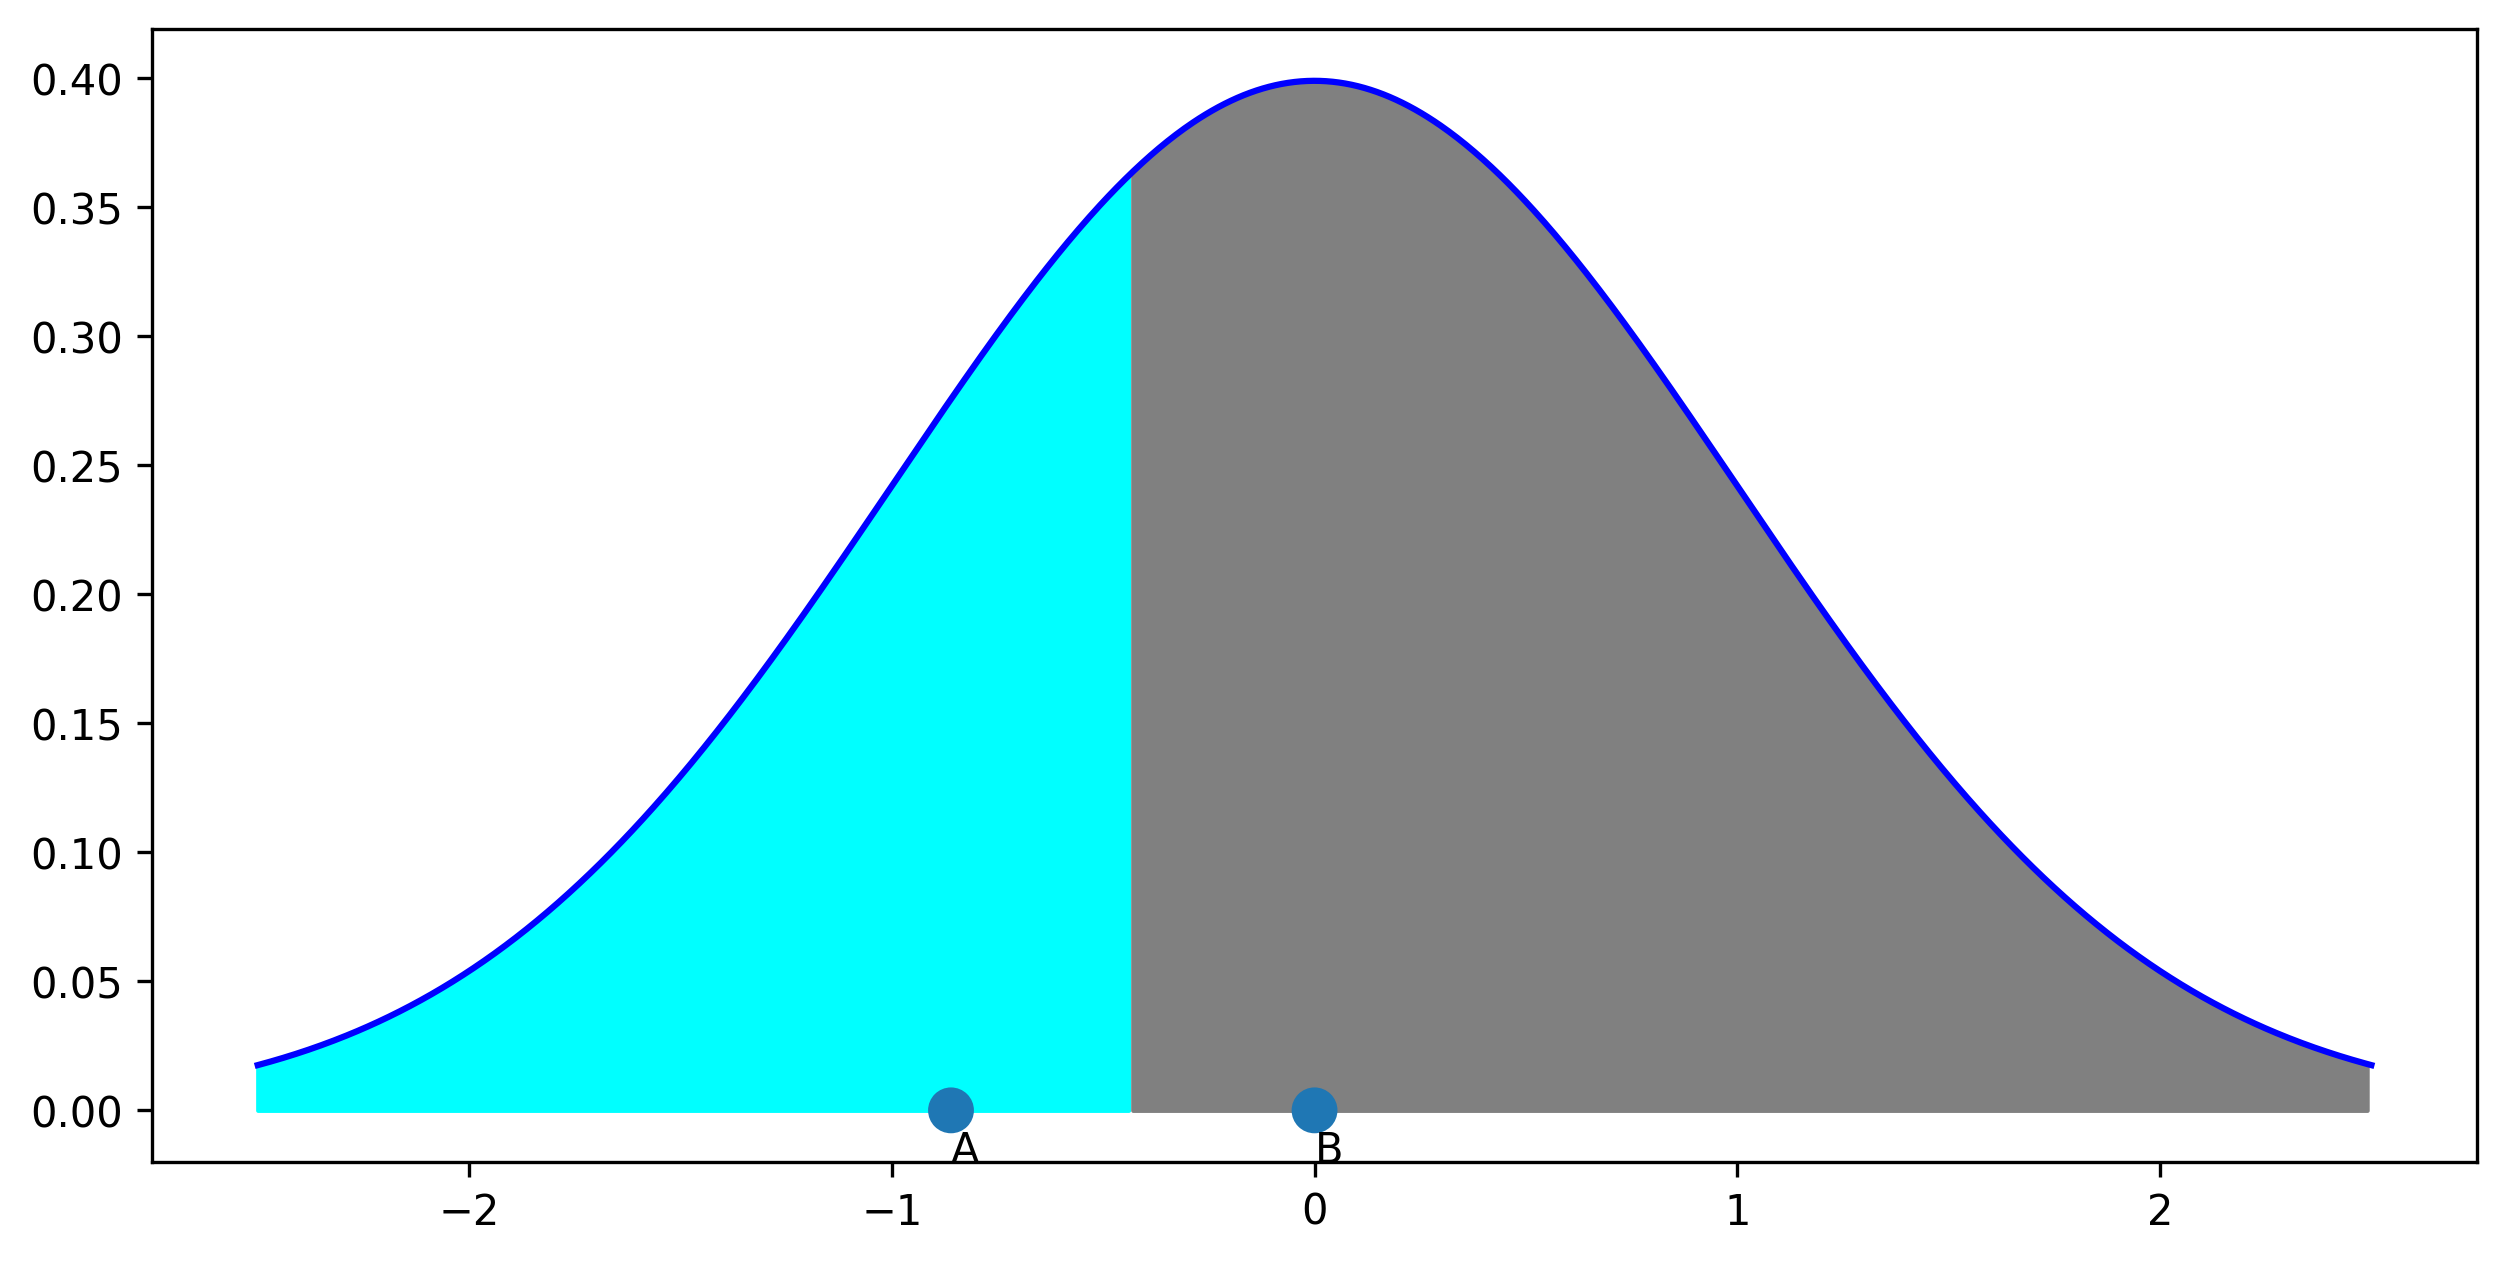

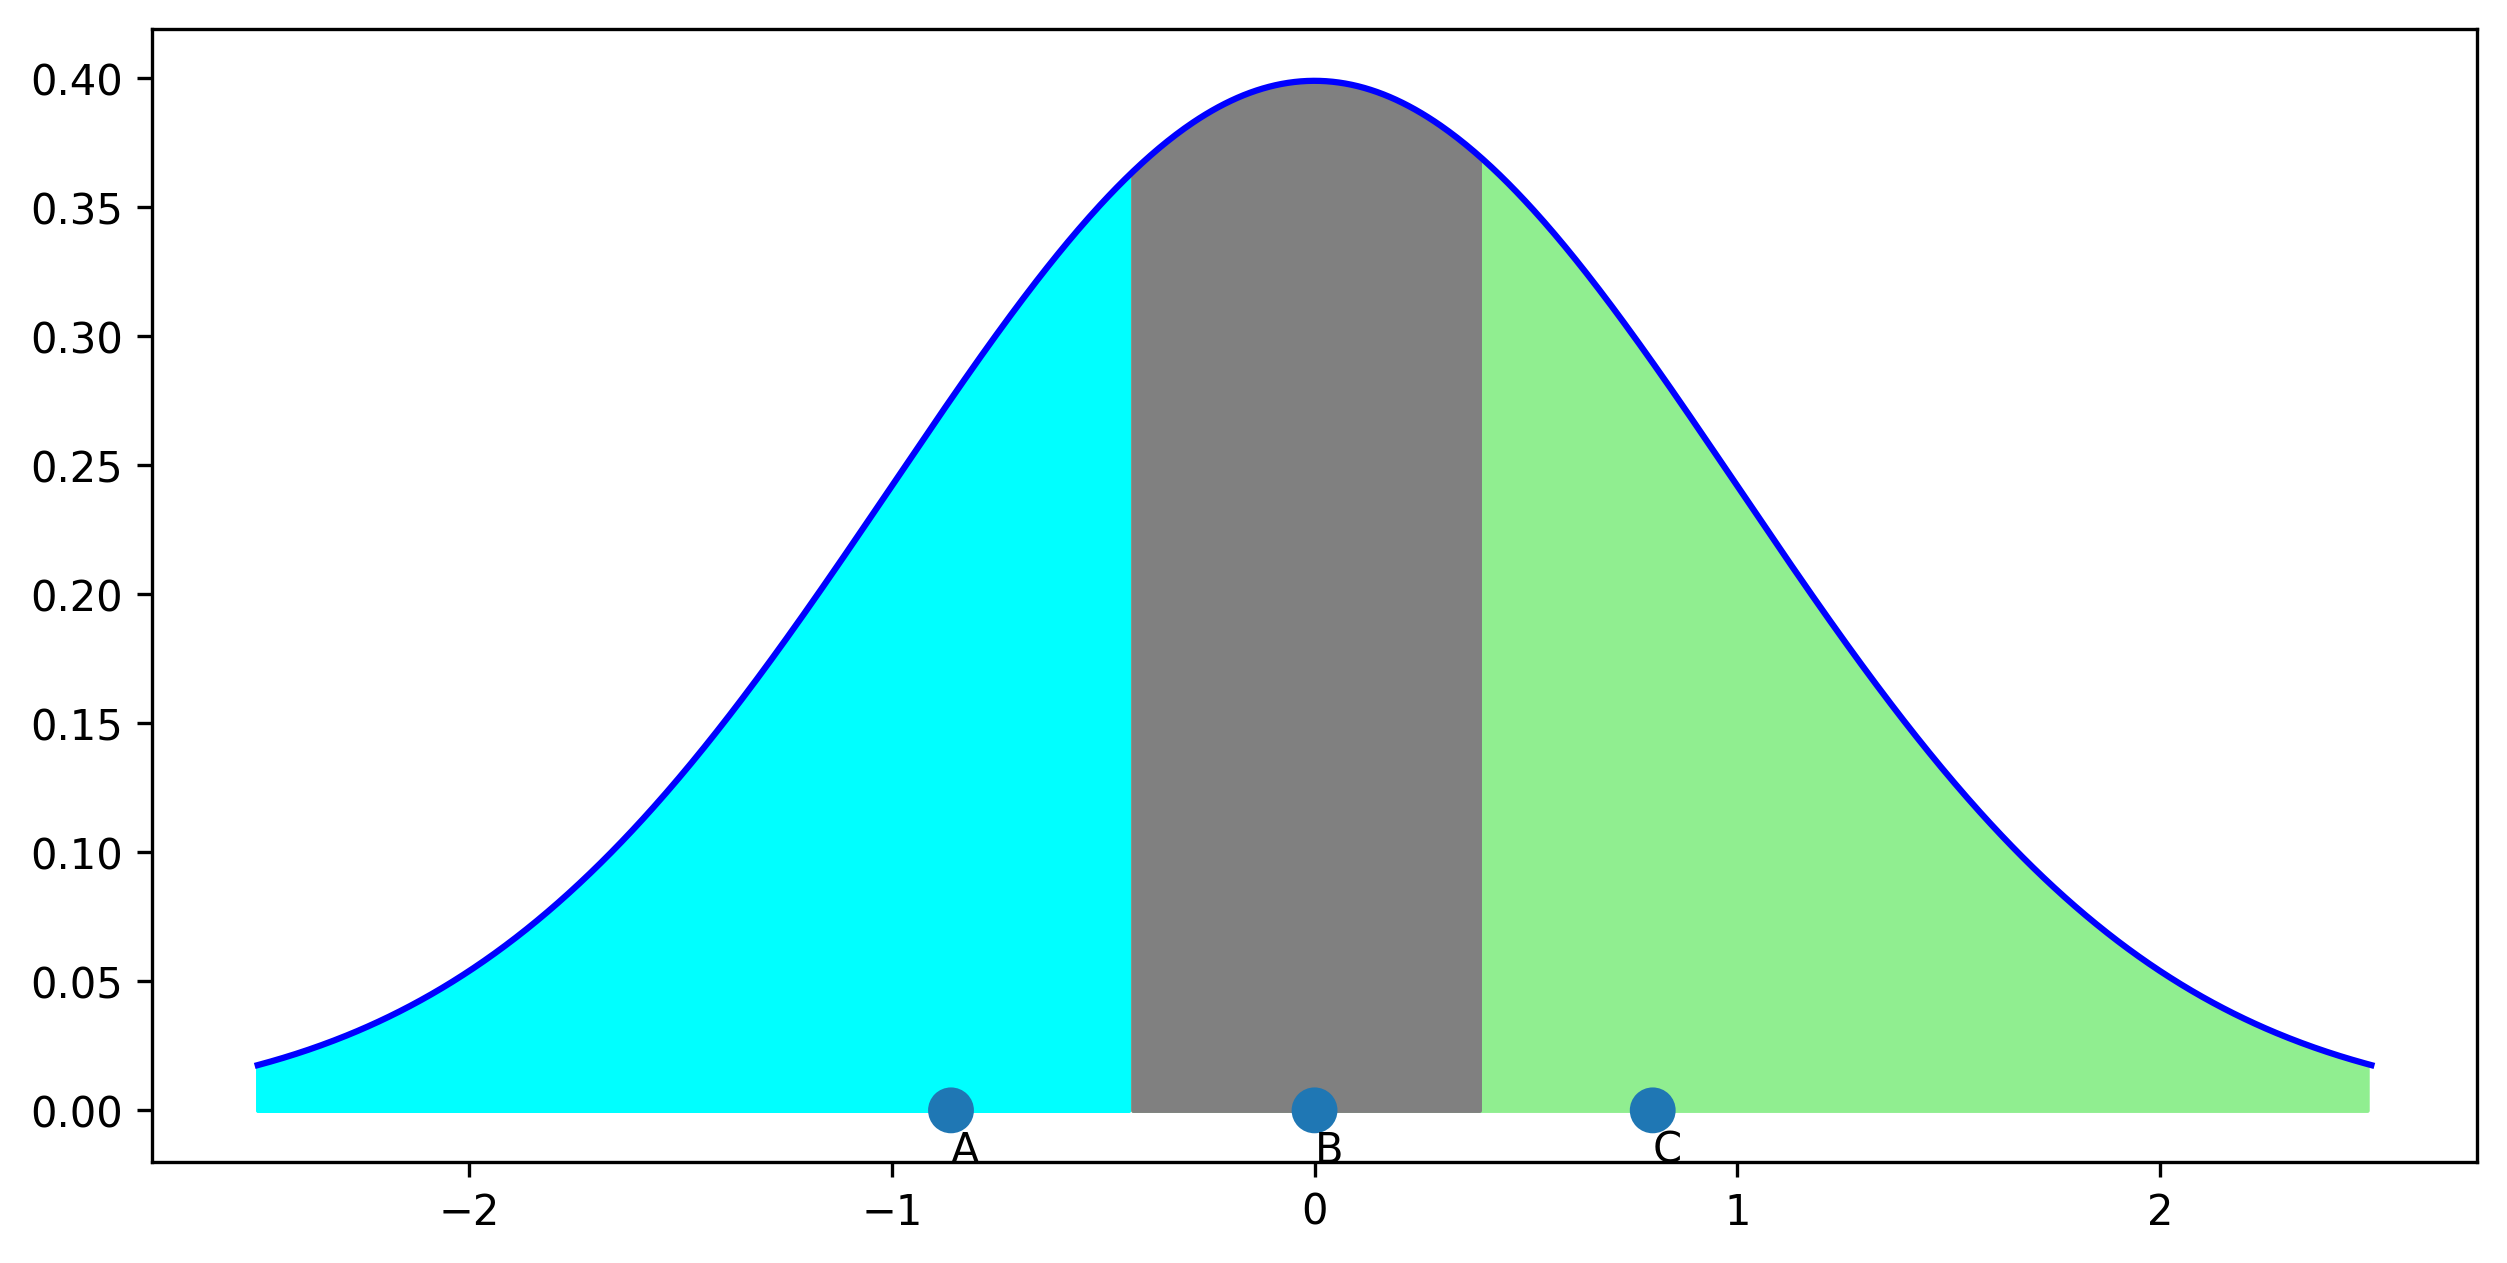

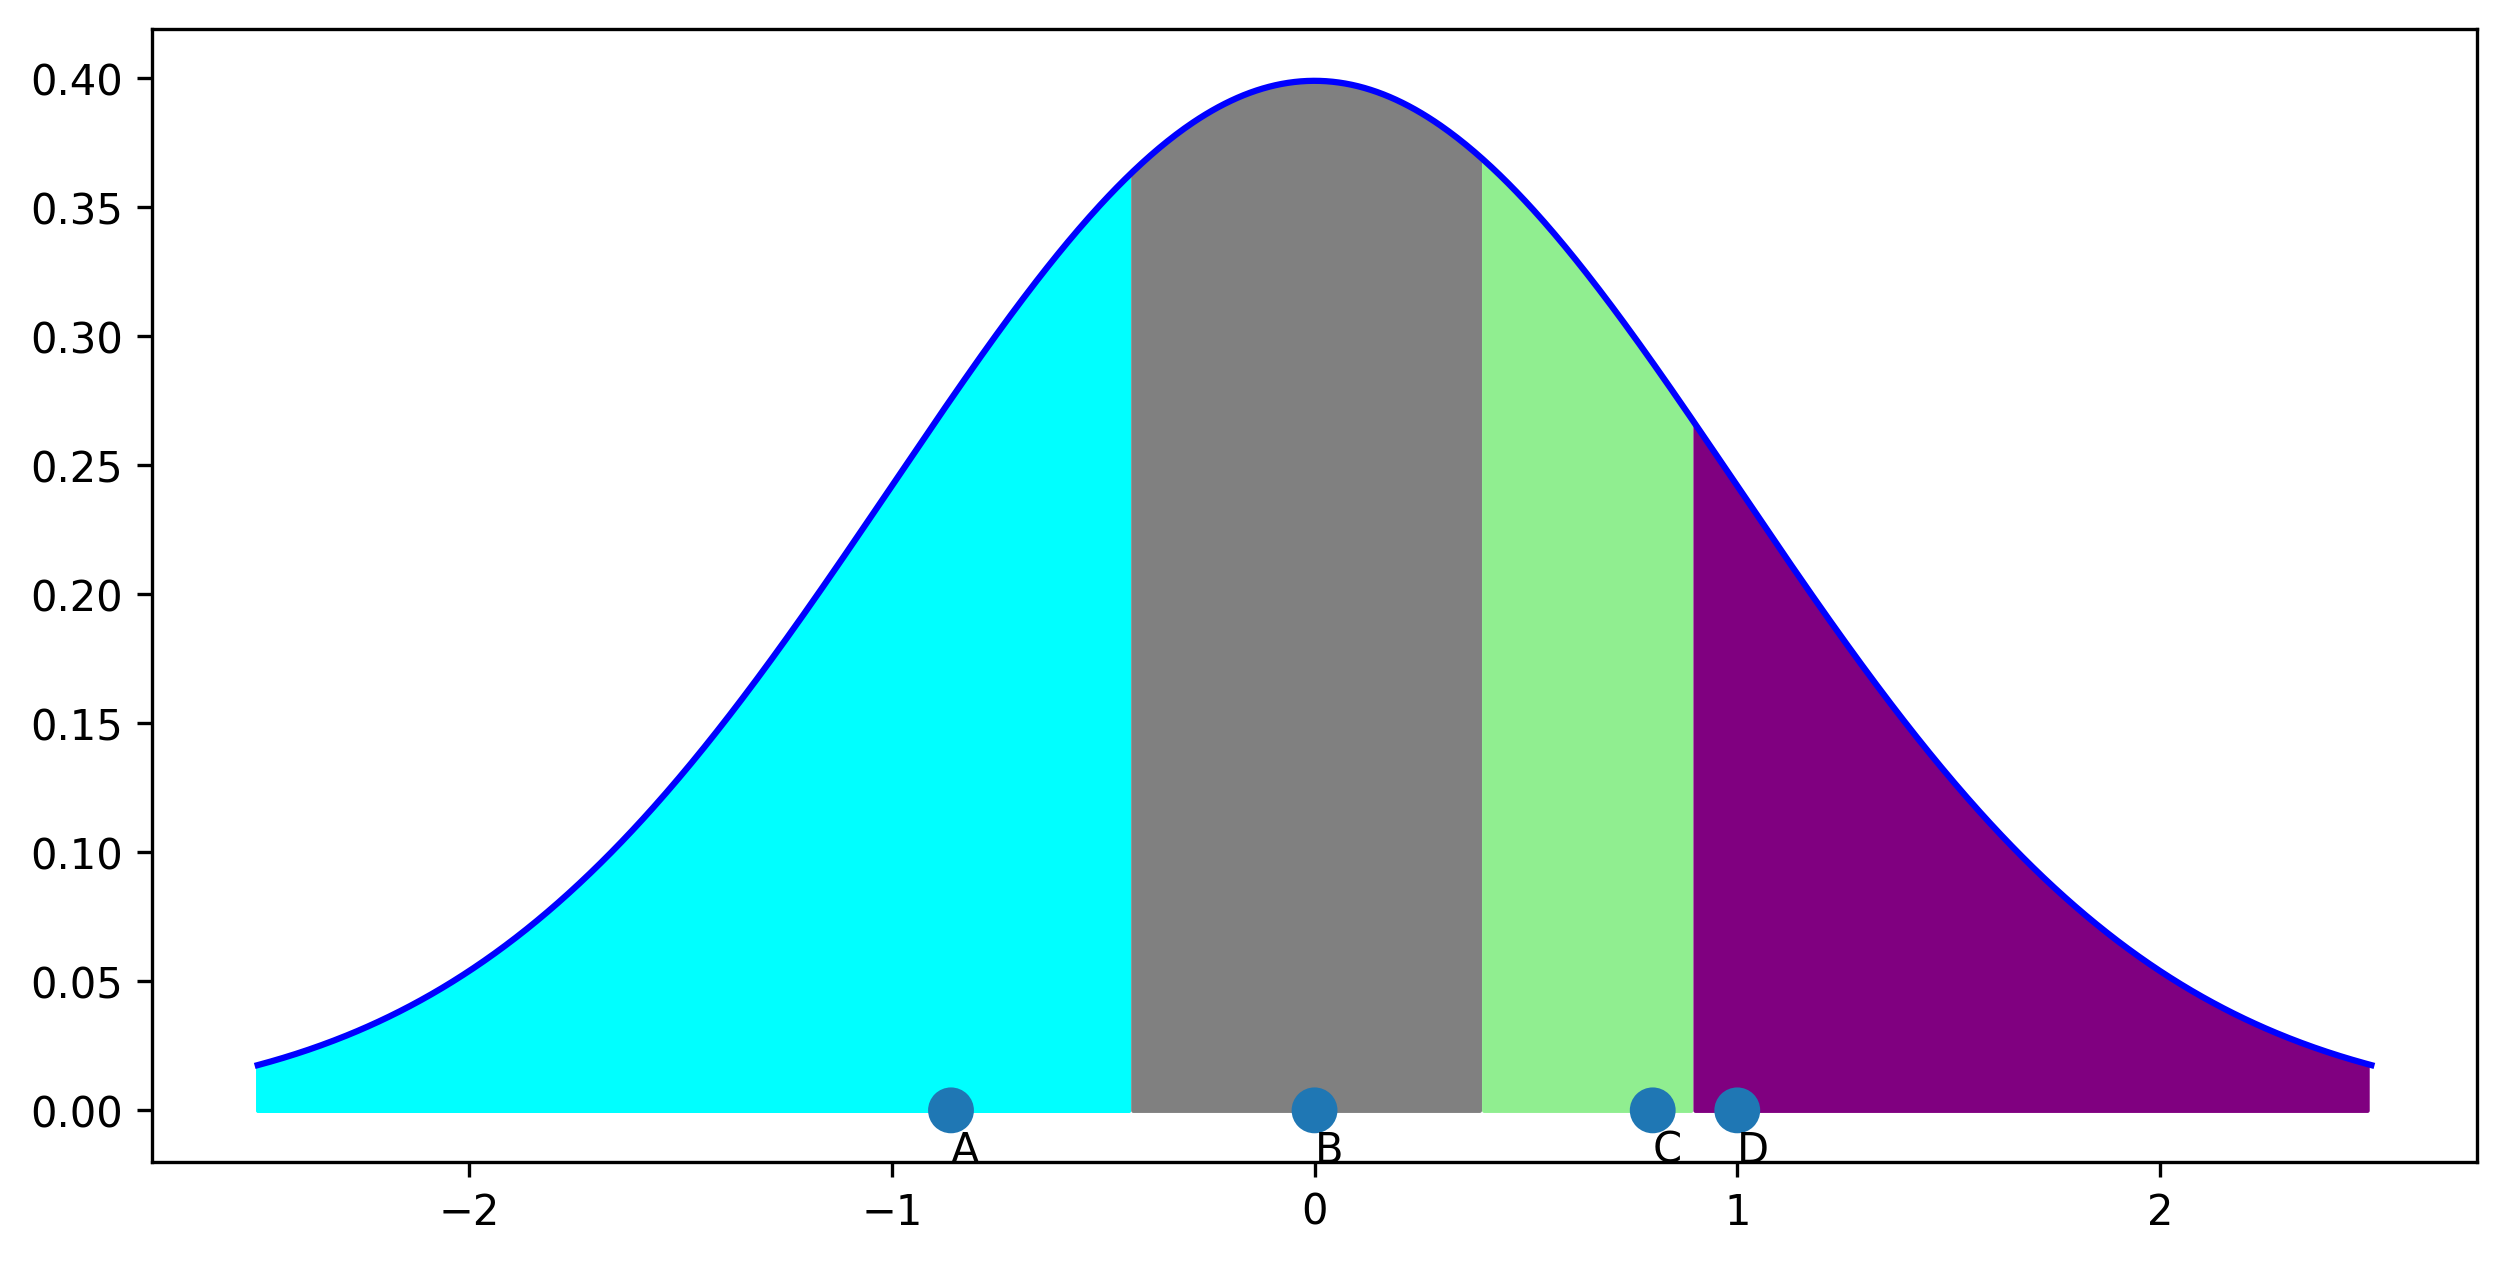

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as stats
#plt.style.use('ggplot')
mean=0
std=1
b1_location=-.86
b2_location = .80
b3_location = 1.0
d1 = b1_location / 2
d2 = b2_location / 2
d3 = (b2_location + b3_location) / 2

mpl.rcParams['figure.dpi'] = 300

domain = 2.5
x=np.linspace(-domain, domain, 1000)
iq=stats.norm(mean, std)

In [11]:
def CumulativeNormalDistribution(xRaw: float) -> float:
    if xRaw < 0:
        neg = 1
    else:
        neg = 0

    k = 1.0 / (1.0 + 0.2316419 * abs(xRaw))
    y = ((((1.330274429 * k - 1.821255978) * k + 1.781477937) * k - 0.356563782) * k + 0.319381530) * k
    y = 1.0 - 0.398942280401 * np.exp(-0.5 * (xRaw * xRaw)) * y
    return (1.0 - neg) * y + neg * (1.0 - y)

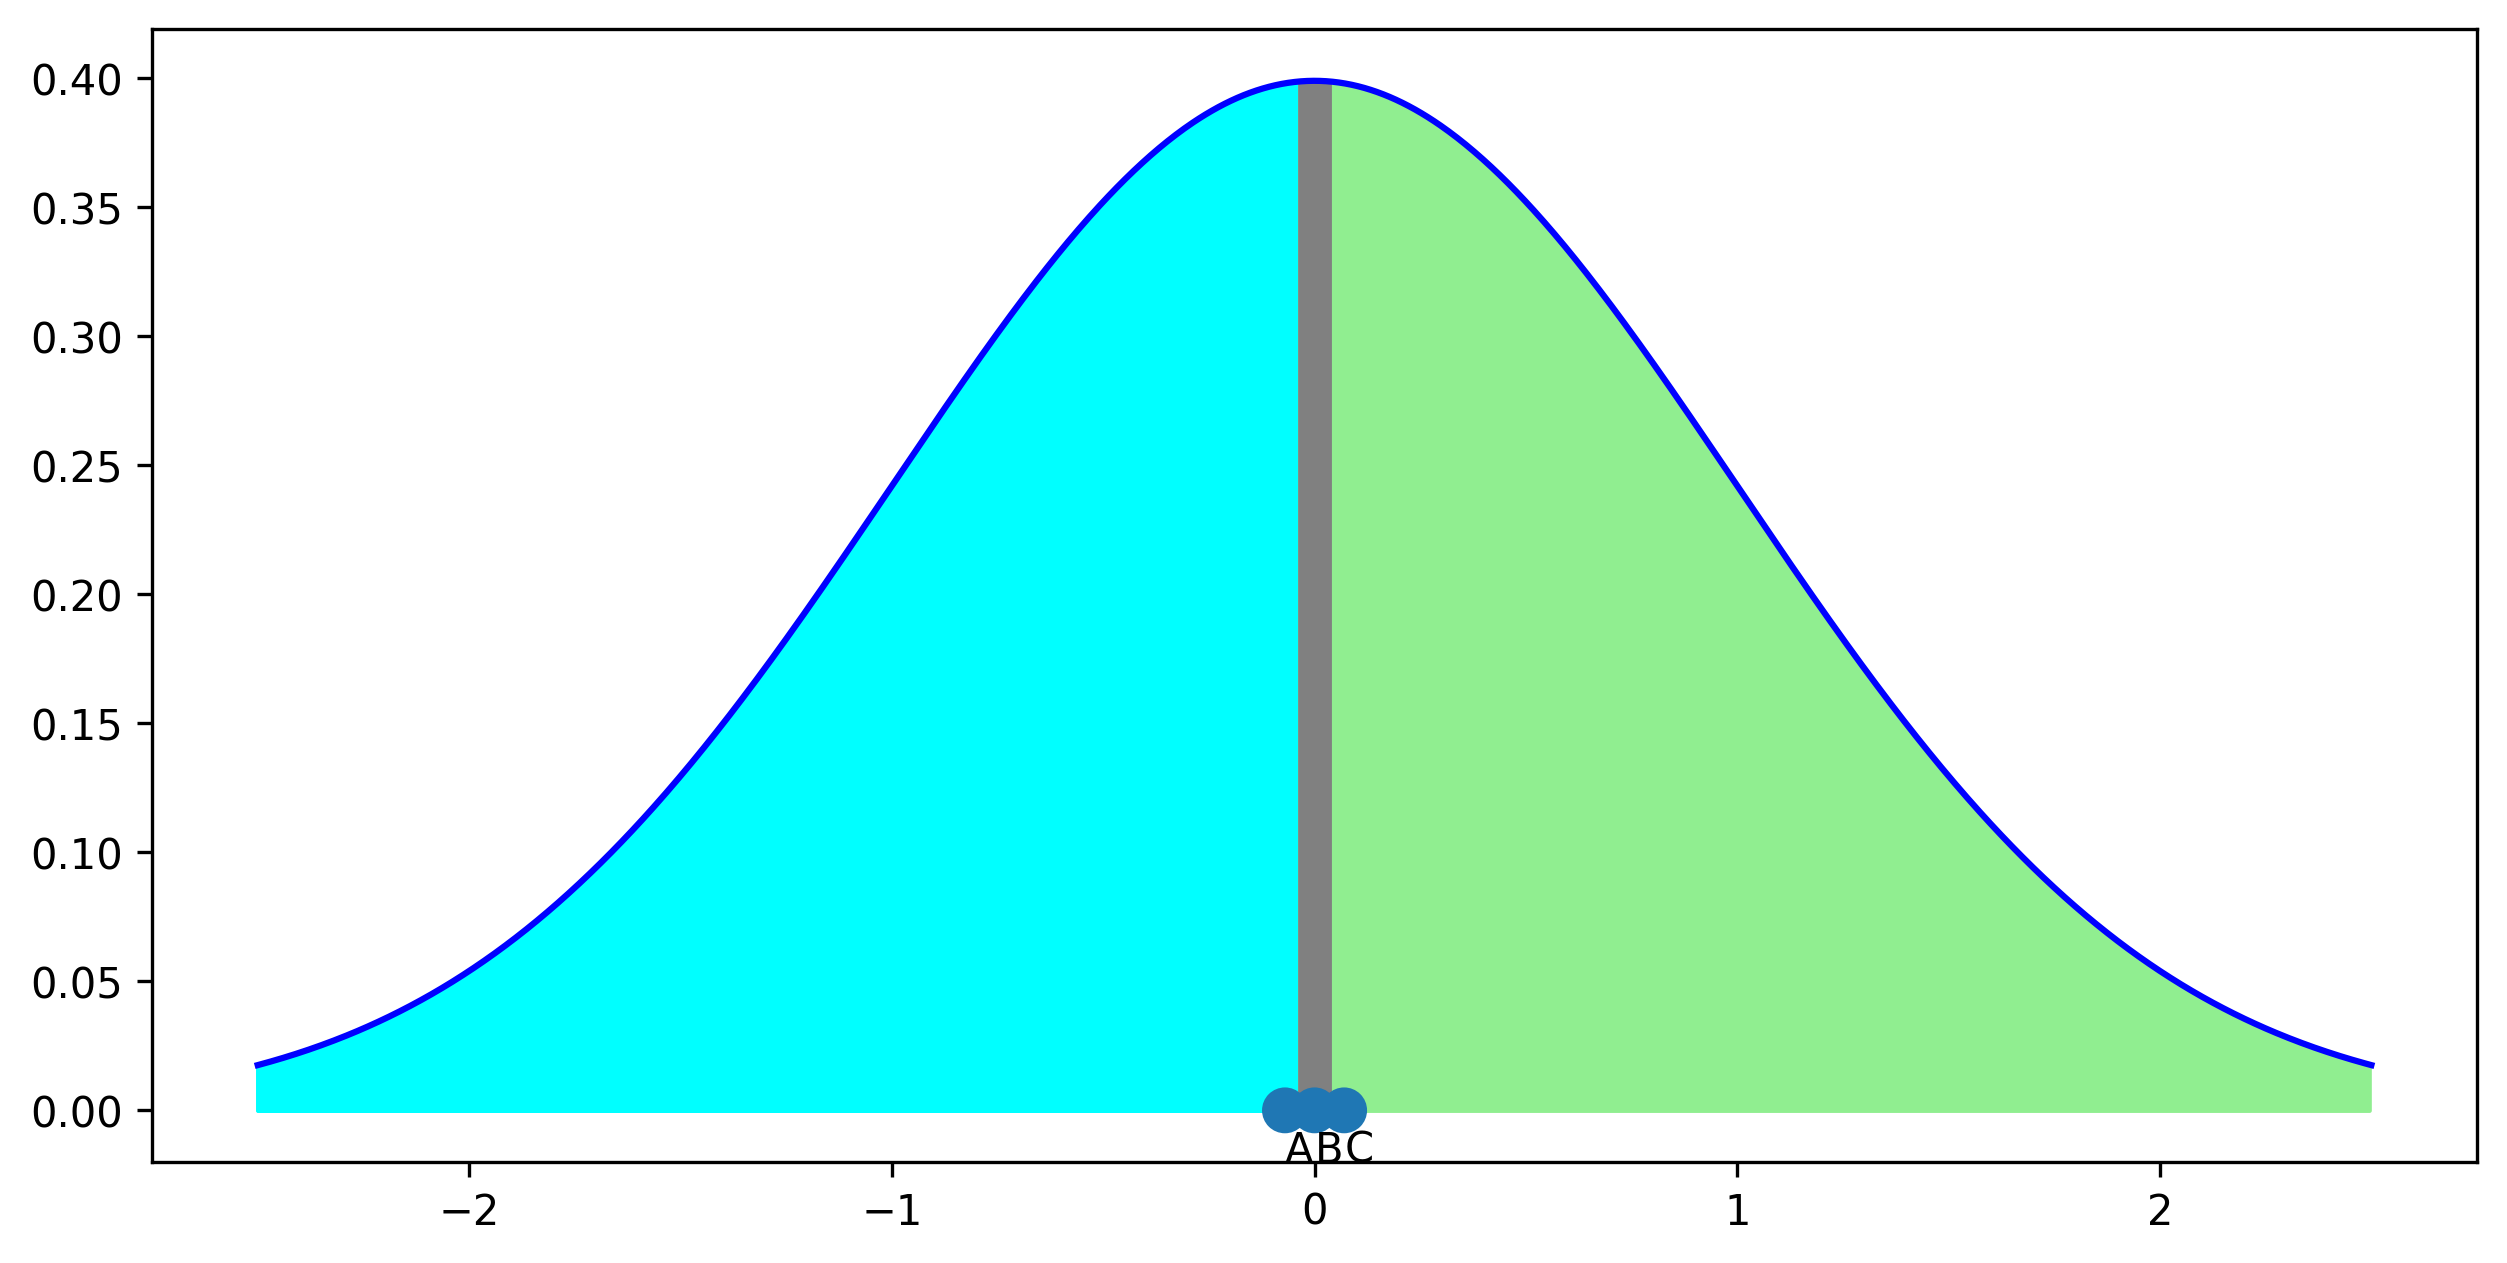

In [24]:
def make_plot1():
    fig, a1 = plt.subplots(1,1, figsize=(10,5))
    plt.gcf().set_facecolor('white')

    a1.plot(x,iq.pdf(x),'b')
    px=np.arange(-domain,d1,.01)
    a1.fill_between(px,iq.pdf(px),color='cyan')

    # px=np.arange(dividing_line,domain,.01)
    # a1.fill_between(px,iq.pdf(px),color='lightgreen')

    px=np.arange(d1, domain,.01)
    a1.fill_between(px,iq.pdf(px),color='gray')

    ccx = [b1_location, 0]
    ccy = [0,0]
    cc = zip(ccx, ccy)

    a1.scatter(ccx, ccy, s=[100,100])
    labels = ["A", "B"]
    for i, txt in enumerate(labels):
        a1.annotate(txt, (ccx[i], ccy[i] - .02))
def make_plot2():

    fig, a2 = plt.subplots(1,1, figsize=(10,5))
    plt.gcf().set_facecolor('white')
    px=np.arange(-domain,d1,.01)
    a2.fill_between(px,iq.pdf(px),color='cyan')

    a2.plot(x,iq.pdf(x),'b')
    px=np.arange(-domain,d1,.01)
    a2.fill_between(px,iq.pdf(px),color='cyan')

    px=np.arange(d1,domain,.01)
    a2.fill_between(px,iq.pdf(px),color='lightgreen')

    px=np.arange(d1, d2,.01)
    a2.fill_between(px,iq.pdf(px),color='gray')

    ccx = [b1_location, 0, b2_location]
    ccy = [0,0,0]
    cc = zip(ccx, ccy)

    a2.scatter(ccx, ccy, s=[100,100,100])
    labels = ["A", "B", "C"]
    for i, txt in enumerate(labels):
        a2.annotate(txt, (ccx[i], ccy[i] - .02))

def make_plot3():

    fig, a2 = plt.subplots(1,1, figsize=(10,5))
    plt.gcf().set_facecolor('white')
    px=np.arange(-domain,d1,.01)
    a2.fill_between(px,iq.pdf(px),color='cyan')

    a2.plot(x,iq.pdf(x),'b')
    px=np.arange(-domain,d1,.01)
    a2.fill_between(px,iq.pdf(px),color='cyan')

    px=np.arange(d2, d3, .01)
    a2.fill_between(px,iq.pdf(px),color='lightgreen')

    px=np.arange(d3, domain,.01)
    a2.fill_between(px,iq.pdf(px),color='purple')

    px=np.arange(d1, d2,.01)
    a2.fill_between(px,iq.pdf(px),color='gray')

    ccx = [b1_location, 0, b2_location, b3_location]
    ccy = [0,0,0,0]
    cc = zip(ccx, ccy)

    a2.scatter(ccx, ccy, s=[100,100,100, 100])
    labels = ["A", "B", "C", "D"]
    for i, txt in enumerate(labels):
        a2.annotate(txt, (ccx[i], ccy[i] - .02))

def make_plot4():
    mean=0
    std=1
    b1_location=-.07
    b2_location = .07
    d1 = b1_location / 2
    d2 = b2_location / 2


    fig, a2 = plt.subplots(1,1, figsize=(10,5))
    plt.gcf().set_facecolor('white')
    px=np.arange(-domain,d1,.01)
    a2.fill_between(px,iq.pdf(px),color='cyan')

    a2.plot(x,iq.pdf(x),'b')
    px=np.arange(-domain,d1,.01)
    a2.fill_between(px,iq.pdf(px),color='cyan')

    px=np.arange(d1,domain,.01)
    a2.fill_between(px,iq.pdf(px),color='lightgreen')

    px=np.arange(d1, d2,.01)
    a2.fill_between(px,iq.pdf(px),color='gray')

    ccx = [b1_location, 0, b2_location]
    ccy = [0,0,0]
    cc = zip(ccx, ccy)

    a2.scatter(ccx, ccy, s=[100,100,100])
    labels = ["A", "B", "C"]
    for i, txt in enumerate(labels):
        a2.annotate(txt, (ccx[i], ccy[i] - .02))
# make_plot1()
# make_plot2()
# make_plot3()
make_plot4()

In [16]:
locations = [b1_location, 0, b2_location, b3_location]
for idx in range(len(locations)):
    l = locations[idx]

    div = 100
    if idx + 1 < len(locations):
        div = CumulativeNormalDistribution((locations[idx] + locations[idx + 1]) / 2)

    rank = CumulativeNormalDistribution(l)
    print(f"{l:.2f} {rank * 100:.4f} dividing_line {div * 100:.4f}")

-0.86 19.4894 dividing_line 33.3598
0.00 50.0000 dividing_line 65.5422
0.80 78.8145 dividing_line 81.5940
1.00 84.1345 dividing_line 10000.0000


In [10]:
count = 10000
for dim in [1,2,3]:
    x = np.random.normal(0, 1, dim * count)
    x = np.array(x)
    x = x.reshape((count, dim))
    x = np.sum(x * x, axis = 1)
    x = np.mean(np.sqrt(x))
    print("dim %d euclidean of noise: %5.2f" % (dim, x * .05))

dim 1 euclidean of noise:  0.04
dim 2 euclidean of noise:  0.06
dim 3 euclidean of noise:  0.08


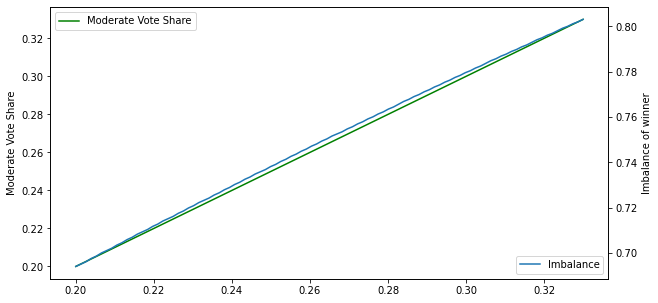

In [11]:
def CumulativeNormalDistribution(xRaw: float) -> float:
    if xRaw < 0:
        neg = 1
    else:
        neg = 0

    k = 1.0 / (1.0 + 0.2316419 * abs(xRaw))
    y = ((((1.330274429 * k - 1.821255978) * k + 1.781477937) * k - 0.356563782) * k + 0.319381530) * k
    y = 1.0 - 0.398942280401 * np.exp(-0.5 * (xRaw * xRaw)) * y
    return (1.0 - neg) * y + neg * (1.0 - y)

def plot_cdf():
    x = np.linspace(-5, 5, 1000)
    y = [CumulativeNormalDistribution(xx) for xx in x]
    fix, axis = plt.subplots(1,1,figsize = (10,5))
    axis.plot(x, y)

def find_cdf_value(v: float):
    xx = np.linspace(0, .5, 1000)
    y0 = CumulativeNormalDistribution(0)
    for x in xx:
        if CumulativeNormalDistribution(x) - y0 > v:
            return x


def plot_c_share():
    c_share = []
    lr_balance = []

    xx = np.linspace(.20, .33, 100)
    for x in xx:
        half_c = x / 2
        boundary = find_cdf_value(half_c)
        c_share.append(x)
        lr_balance.append(CumulativeNormalDistribution(2 * boundary))


        # print("centrist_share of %.3f is %6.4f left/right balance of %6.4f" %
        #       (x, boundary, CumulativeNormalDistribution(2 * boundary)))

    fix, axis = plt.subplots(1,1,figsize = (10,5))
    axis.plot(xx, c_share, label="Moderate Vote Share", color="green")
    axis.set_ylabel("Moderate Vote Share")
    ax2 = axis.twinx()
    ax2.plot(xx, lr_balance, label="Imbalance")
    ax2.set_ylabel("Imbalance of winner")
    axis.legend(loc="upper left")
    ax2.legend(loc="lower right")

plot_c_share()


/var/folders/bk/gdh16lyd147dmnfx84pr5n8c0000gn/T/ipykernel_8270/1391004667.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt3d = plt.figure().gca(projection='3d')


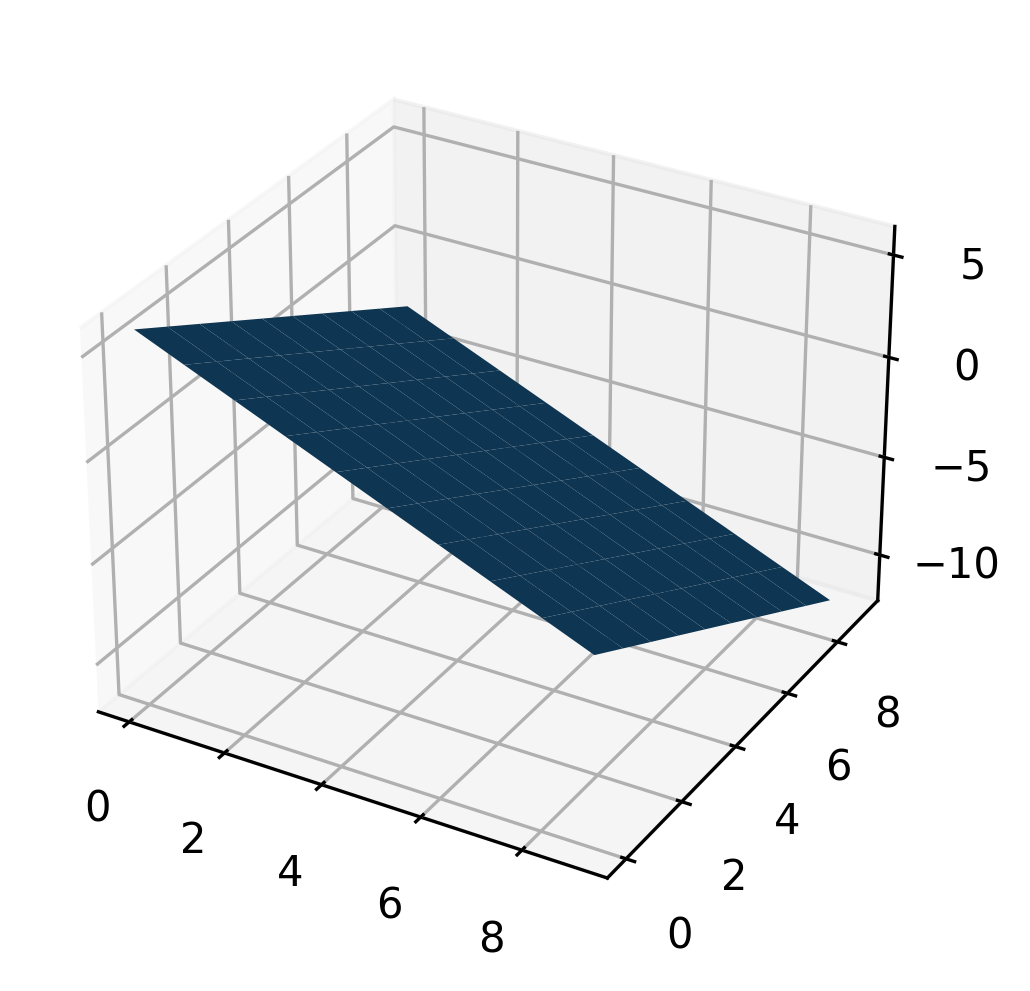

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point  = np.array([1, 2, 3])
normal = np.array([2, 2, 2])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt.show()

In [21]:
xx
yy
zz

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])